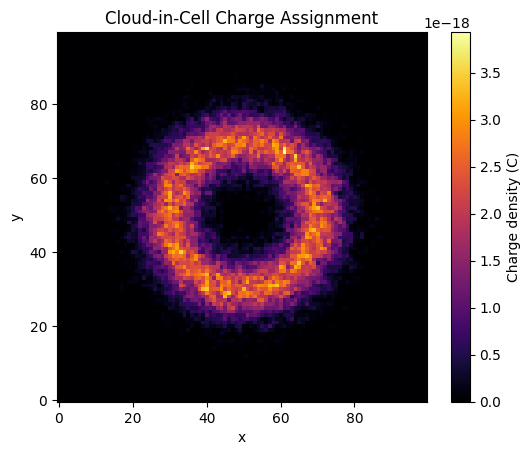

In [1]:
import numpy as np
import matplotlib.pyplot as plt


particles = np.loadtxt("particles.dat") 
M = 100
rho = np.zeros((M, M))
e = 1.602e-19 


for x, y in particles:
    i = int(x)
    j = int(y)
    dx = x - i
    dy = y - j

    lls
    if 0 <= i < M - 1 and 0 <= j < M - 1:
        rho[i, j]     += e * (1 - dx) * (1 - dy)
        rho[i+1, j]   += e * dx * (1 - dy)
        rho[i, j+1]   += e * (1 - dx) * dy
        rho[i+1, j+1] += e * dx * dy


plt.imshow(rho.T, origin='lower', cmap='inferno')
plt.colorbar(label="Charge density (C)")
plt.title("Cloud-in-Cell Charge Assignment")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
Converged in 2506 iterations


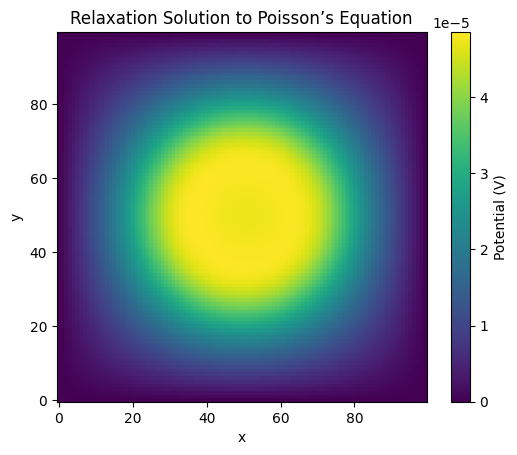

In [2]:
import numpy as np
import matplotlib.pyplot as plt


M = 100
eps0 = 8.854e-12
phi = np.zeros((M, M))
tolerance = 1e-8


def laplace_step(phi, rho, a=1.0, eps0=8.854e-12):
    phi_new = phi.copy()

    phi_new[1:-1, 1:-1] = 0.25 * (
        phi[2:, 1:-1] + phi[:-2, 1:-1] +  # neighbors in x
        phi[1:-1, 2:] + phi[1:-1, :-2] +  # neighbors in y
        rho[1:-1, 1:-1] * a**2 / eps0     # source term
    )

    return phi_new


a = 1.0  
iterations = 0
while True:
    phi_new = laplace_step(phi, rho)
    delta = np.max(np.abs(phi_new - phi))
    phi = phi_new
    iterations += 1
    if iterations % 200 == 0:
        print(iterations)
    if delta < tolerance:
        break

print("Converged in", iterations, "iterations")

plt.imshow(phi.T, origin='lower', cmap='viridis')
plt.colorbar(label="Potential (V)")
plt.title("Relaxation Solution to Poisson’s Equation")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


0.6180339887498949
0.3819660112501051
0.23606797749978958
0.1458980337503153
0.09016994374947407
0.055728090000841
0.034441853748632845
0.021286236252208157
0.01315561749642491
0.00813061875578347
0.005024998740641662
0.00310562001514203
0.001919378725499632
0.001186241289642176
0.0007331374358574561
Optimal ω: 1.945


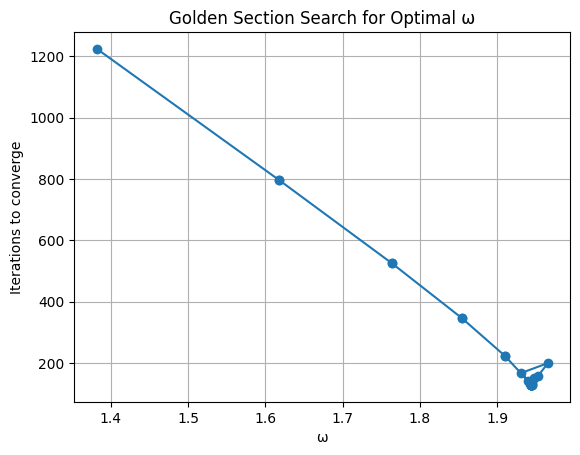

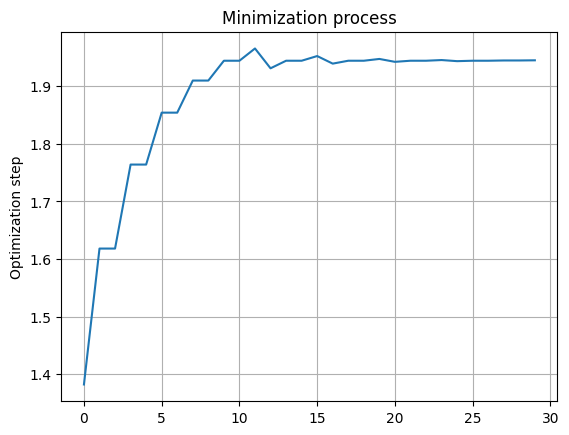

In [3]:
import numpy as np
import matplotlib.pyplot as plt


M =100
eps0 = 8.854e-12
a = 1.0
tolerance = 1e-8


def sor_step(phi, rho, omega):
    max_diff = 0.0
    for i in range(1, M-1):
        for j in range(1, M-1):
            old = phi[i, j]
            new = 0.25 * (
                phi[i+1, j] + phi[i-1, j] +
                phi[i, j+1] + phi[i, j-1] +
                rho[i, j] * a**2 / eps0
            )
            phi[i, j] = old + omega * (new - old)
            max_diff = max(max_diff, abs(phi[i, j] - old))
    return max_diff

def cost(omega):
    phi = np.zeros((M, M))
    for k in range(10000): 
        diff = sor_step(phi, rho, omega)
        if diff < tolerance:
            return k
    return 10000  


history = []
def optimize_omega():
    gr = (np.sqrt(5) + 1) / 2
    a_w, b_w = 1.0, 2.0   
    

    while abs(b_w - a_w) > 0.001:
        c = b_w - (b_w - a_w) / gr
        d = a_w + (b_w - a_w) / gr
        fc = cost(c)
        fd = cost(d)
        history.append((c, fc))
        history.append((d, fd))
        if fc < fd:
            b_w = d
        else:
            a_w = c
        print(abs(b_w - a_w))

    omega_opt = (a_w + b_w) / 2
    print("Optimal ω:", round(omega_opt, 3))

    return omega_opt


omega_best = optimize_omega()


steps, values = zip(*history)
plt.plot(steps, values, marker='o')
plt.xlabel("ω")
plt.ylabel("Iterations to converge")
plt.title("Golden Section Search for Optimal ω")
plt.grid(True)
plt.show()

plt.plot(range(len(steps)), steps, marker='o')
plt.ylabel("ω")
plt.xlabel("Optimization step")
plt.title("Minimization process")
plt.grid(True)
plt.show()


Converged in 133 iterations with ω=1.945


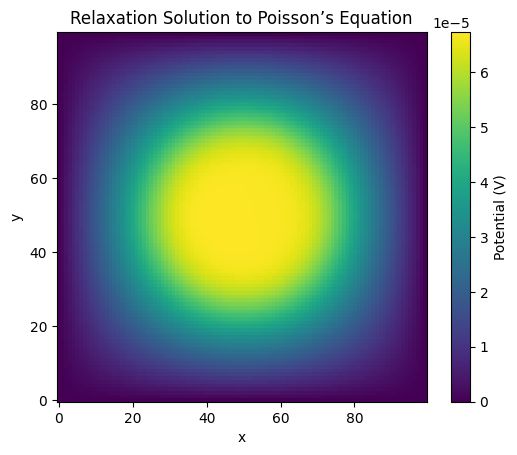

In [4]:

def solve_poisson(rho, omega=1.8, max_iter=10000):
    phi = np.zeros((M, M))
    for k in range(max_iter):
        diff = sor_step(phi, rho, omega)
        if diff < tolerance:
            print(f"Converged in {k} iterations with ω={omega}")
            return phi
    print("Did not converge within max_iter")
    return phi


phi = solve_poisson(rho, omega=1.945)

plt.imshow(phi.T, origin='lower', cmap='viridis')
plt.colorbar(label="Potential (V)")
plt.title("Relaxation Solution to Poisson’s Equation")
plt.xlabel("x")
plt.ylabel("y")
plt.show()